# Good Morning Bluesky: Starting your experiment

In this notebook you will:

* Start your virtual bluesky session 
    * akin to `bsui` in a beamline computer terminal session
* Configure custom metadata for your experiment
* Use three common experimental procedures ("plans") that are built into bluesky
* Learn about the bluesky RunEngine states


Recommend Prerequisites:

* [Hello Python and Jupyter](./Hello%20Python%20and%20Jupyter.ipynb)

In [ ]:
#pip install -U --pre databroker[all]

<font color='green' size="6">Hosted by <font color='red'><b>Andi</b></font></font> 

<div class="alert alert-block alert-warning">
<b>Disclaimer:</b> This tutorial uses bluesky in its "out-of-the-box" installation, which <em>should</em> work at any bluesky beamline.  
</div> 


However, bluesky offers lots of flexiblity and often beamline staff want to further customize bluesky for the majority of their users.


Other beamlines like the flexibility and choose to largely rely on lower level aquistion plans.

## Start Bluesky
Below, setup the "beamline" configuration or profile.
*  the beamlines, being more complex, are automaticaly configured using the beamline profile
* [examples of NSLS-II beamline profiles](https://github.com/NSLS-II/profile-collection-ci)



In [2]:
%run -i gm_user/user_profile.py

Tiled version 0.1.0b9


Is bluesky alive and waiting on you? 

```python
RE.state
```

The cell should return:
```
'idle'
```


<details><summary><b>If you see an error </b></summary>

    
and it is
```
NotImplementedError: databroker 2.0.0 does not yet support 'temp' Broker

```

Then scroll up, uncomment, and run
```python
pip install -U --pre databroker[all]

```
    
Then restart your kernel as suggested (Select Kernel, Restart Kernel).

In [3]:
RE.state

'idle'

There are other states and manual ways to control the state of the **R**un**E**ngine.  We will learn about those in this notebook.

## Customize
Now lets add customized RE metadata by editing [gm_user/user_startup.py](./gm_user/user_startup.py).

<div class="alert alert-block alert-warning">
<b>Caution:</b> Some beamlines have their own custom functions for this task and so this this python file is not needed.  Or sometimes beamlines use reserved key names that are not "protected".  Always ask first.
</div>


In [4]:
%run -i gm_user/user_startup.py

Confirm that your persistent metadata is as you like it.

```python
RE.md
```

In [6]:
RE.md

<PersistentDict {'group': 'PI_for_group', 'instrument': 'virtual', 'sample': 'bytes'}>

Ok, but that is hard to read.  



- What things do you know about python dictionaries that you can apply here?
- Did you notice the convience function in [gm_user/user_startup.py](./gm_user/user_startup.py)?


<details><summary><b>Copy Paste Code</b></summary>

```python
list(RE.md)

RE.md.keys()

RE.md["instrument"]

md_info()

```
</details>

<!-- <div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>
 -->



Since the start of most experiments are setup and alignment, lets label all the data as such.  
```python
RE.md["purpose"] = "setup"

```


In [7]:
RE.md["purpose"] = "setup"

In [8]:
md_info()

Current peristent metadata for each scan are:
    group_________________________ : PI_for_group
    instrument____________________ : virtual
    sample________________________ : bytes
    purpose_______________________ : setup


 Use 'md_info()' or 'RE.md' to inspect again.


## Data Acquisition

### Executing a `count` plan with various parameters

In the example below, the Bluesky RE consmumes the plan `count()`. `count()` is an experiment plan used here to acquire one reading from a detector.

In this case, `det` or `noisy_det` is are point detectors.  We will start with `noisy_det`.

In [9]:
RE(count([noisy_det]))



Transient Scan ID: 1     Time: 2025-01-27 17:12:44
Persistent Unique Scan ID: '469c4346-d0a8-4e60-a9cb-c657f6ada18e'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |  noisy_det |
+-----------+------------+------------+
|         1 | 17:12:44.2 |      0.998 |
+-----------+------------+------------+
generator count ['469c4346'] (scan num: 1)





('469c4346-d0a8-4e60-a9cb-c657f6ada18e',)

The returned value above is a list of the run IDs that uniquely identify this data set (`uid`'s). The "scan number" (`scan_id`) is easier to remember but is not good for long-term reference because it may not be unique.



What else can `count` do to make your experiment better?

**Hint:** `count` is like any other python function. You can view it's documentation in this notebook.

<details><summary><b>Copy Paste Code</b></summary>

```python
help(count)

count?

count??

```
</details>

Let's just get 5 readings for count



Transient Scan ID: 2     Time: 2025-01-27 17:12:48
Persistent Unique Scan ID: 'c99349cd-f621-4039-a96f-f6474e11832e'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |  noisy_det |
+-----------+------------+------------+
|         1 | 17:12:48.1 |      1.023 |
|         2 | 17:12:48.1 |      0.993 |
|         3 | 17:12:48.2 |      1.074 |
|         4 | 17:12:48.2 |      0.933 |
|         5 | 17:12:48.3 |      0.913 |
+-----------+------------+------------+
generator count ['c99349cd'] (scan num: 2)





('c99349cd-f621-4039-a96f-f6474e11832e',)

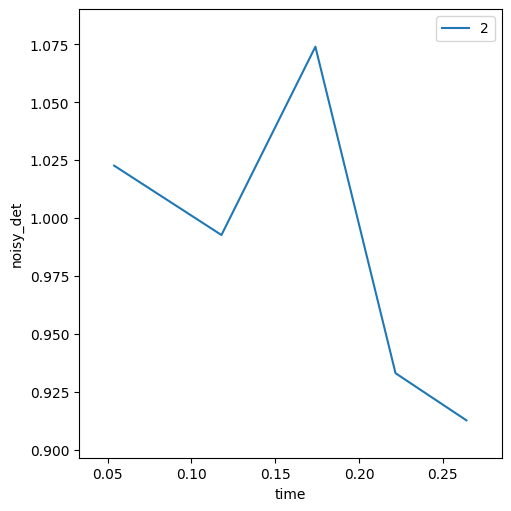

In [10]:
# five consecutive readings
RE(count([noisy_det], num=5))

### Scan

Scan `motor` from -10 to 10, stopping at 15 equally-spaced points and reading `noisy_det` at each point.



Transient Scan ID: 3     Time: 2025-01-27 17:12:51
Persistent Unique Scan ID: '1ba4e6a1-5409-4370-bc44-7fac846e07c5'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |  noisy_det |
+-----------+------------+------------+------------+
|         1 | 17:12:51.8 |    -10.000 |      0.097 |
|         2 | 17:12:51.8 |     -8.571 |     -0.062 |
|         3 | 17:12:51.9 |     -7.143 |     -0.100 |
|         4 | 17:12:51.9 |     -5.714 |      0.027 |
|         5 | 17:12:52.0 |     -4.286 |      0.064 |
|         6 | 17:12:52.0 |     -2.857 |      0.083 |
|         7 | 17:12:52.1 |     -1.429 |      0.330 |
|         8 | 17:12:52.1 |      0.000 |      1.005 |
|         9 | 17:12:52.1 |      1.429 |      0.363 |
|        10 | 17:12:52.2 |      2.857 |     -0.081 |
|        11 | 17:12:52.2 |      4.286 |      0.053 |
|        12 | 17:12:52.2 |      5.714 |      0.077 |
|        13 | 17:12:52.3 |      7.143 |     -0.018 |
|        14

('1ba4e6a1-5409-4370-bc44-7fac846e07c5',)

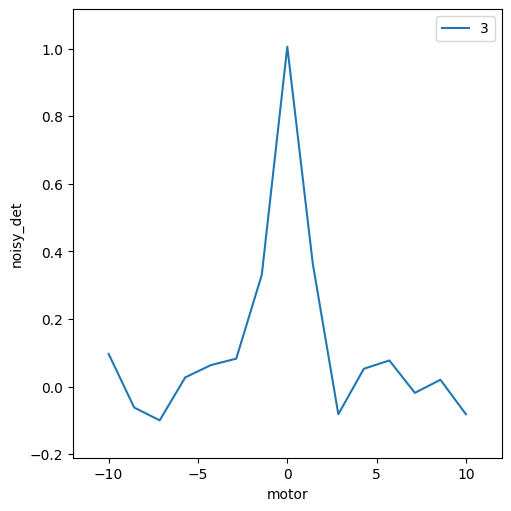

In [11]:
RE(scan([noisy_det], motor, -10, 10, 15))

How do we know where `motor` is now?

[Bluesky magics](https://blueskyproject.io/bluesky/magics.html) (specific magics just for bluesky) can help us find the motor position

In [ ]:
%wa 

<font color='green' size="6">Hosted by <font color='blue'><b>Josh</b></font></font>

Or interrogating the ophyd object's read attributes or `read_attrs`.

In [ ]:
motor

In [ ]:
motor.readback

In [ ]:
motor.readback.get()

In [ ]:
motor.readback.read()

**QUESTION:** What is the difference between `.read()` and `.get()`?

<font color='green' size="6">Hosted by <font color='red'><b>Andi</b></font></font> 

## Move

Bluesky has lower level plans (stub plans aka `bluesky.plan_stubs`). This module contains smaller plans that can be used alone or as buildling blocks for larger plans.

Moving a motor (any other "set-able" object) can be accomplished with `mv`. 

Try to move `motor` to the maximum detector value for the previous scan.
<details><summary><b>Copy Paste Solution</b></summary>
    
```python

RE(mv(motor,0))
```
</details>

In [ ]:
### Complete the line below
RE(mv(motor,))

### Improving the measurement 

The `motor` scan was noisy.  We can think of two ways to improve this:
- more points
- longer measurement time (less noise)

Let's try less noise.   


Let's inspect the device to see the options:

In [ ]:
noisy_det

Since this isn't a real detector, we cannot increase the `acquire_time`.  What other configuration attributes (`config_attrs`) can we adjust?

In [ ]:
noisy_det.noise_multiplier.get()

Let's move `noisy_det.noise_multiplier` to 0.001 and count again.

<!-- 
<details><summary><b>Copy Paste Code</b></summary>
 -->
```python

RE(mv(noisy_det.noise_multiplier, 0.001))

RE(scan([noisy_det], motor, -10, 10, 15))
```
<!-- </details> -->



Let's now try the following:
1. move `noisy_det.noise_multiplier` back to 0.1
2. do a finer scan ( +/- 10 degrees with 1 degree step size)
3. move `motor` to 0



<details><summary><b>Copy Paste Solution</b></summary>

```python

RE(mv(noisy_det.noise_multiplier, 0.1))

RE(scan([noisy_det], motor, -10, 10, 21))

RE(mv(motor, 0))
```
</details>


<div class="alert alert-block alert-danger">
<b>Watch Out for a DAQ Trap #1:</b> 
</div>

Try:
```python
scan?
```

The last argument of `scan()` is num 

```
num : integer
    number of points
```

Bluesky functions works always on the concept of number of points, not number of steps.
```python
int(20/1+1)
```
```
21
```

<div class="alert alert-block alert-danger">
<b>Watch Out for a DAQ Trap #2:</b> 
</div>

It is natural to do the following for experienced researchers that visit many facilities:
```python
RE(mv(noisy_det.noise_multiplier, 0.1)); RE(scan([noisy_det], motor, -10, 10, 21)); RE(mv(motor, 0))
```

It will work. **However**, if you have long count times or fast moving motors you may not be able to stop in time. 

For predictable performance of bluesky, the above is not recommended.

In our next notebook, we will learn the recommended methods for assembling larger plans.

But first, lets see what happens when we stop the RE.

<font color='green' size="6">Hosted by <font color='blue'><b>Josh</b></font></font>

## Interupt the RE

At the beamline using a terminal window, there are two ways to interupt the RunEngine.

- Interupt **immediately**:  `Cntl C` `Cntl C`

- Interupt at the next convient time for the RE: `Cntl C`


But in a jupyter notebook, you must press the stop button (1 or 2 times).  

Start the scan, interupt the RE and instruct it what to do next.

<div class="alert alert-block alert-info">
<b>Bluesky Feature:</b> count() is highly configurable.
</div>

collect data every 3 seconds
```python
delay = 3
```

infite timescan
```python
num = None
```

In [ ]:
RE(count([noisy_det], num = None, delay=3))

In [ ]:
RE.state

In [ ]:
RE.stop()
#RE.abort()
#RE.halt()
#RE.resume()

In [ ]:
db[-1].stop["exit_status"]

# Questions about the above?

## What's next



* [Good Afternoon Bluesky](./Good%20Afternoon%20Bluesky.ipynb)